# EDA for backtesting hyperparameters

When running the back-test, it is essential that we set the correct hyperparameters for entry, exit and abandon thresholds. These must be done on the first time bracket to avoid look forward bias, and ideally, be estimated parameters, rather than 'fit' to the data. This notebook performs said assessments for the OLS spread back-test, I will leave it to the reader to perform the same for the kalman spreads back-test.

My estimation from below suggests to me that ideal params are 
- entry = 2
- exit = 0.5
- abandon = 6

In [4]:
import sys
from dotenv import load_dotenv
import os

load_dotenv()
project_path = os.getenv("PROJECT_PATH")
sys.path.append(project_path)

import pandas as pd

from main.utilities.paths import (
    PATHWAY_TO_COINTEGRATION_AND_RESULTS_DF,
    PATHWAY_TO_SQL_DB_SPREADS,
)
from main.utilities.constants import (
    ENGLE_COINT_P_VALUE_THRESHOLD,
    CORES_TO_USE,
)

from main.utilities.functions import (
    plot_series_with_lines,
    retrieve_spread_table_from_sql_df,
)

In [5]:
results_df = pd.read_parquet(PATHWAY_TO_COINTEGRATION_AND_RESULTS_DF)

In [6]:
sample_spreads = results_df.iloc[:, [0, 1]].sample(10)

In [7]:
for i in sample_spreads.iterrows():
    print(type(i[1]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


<Figure size 1000x600 with 0 Axes>

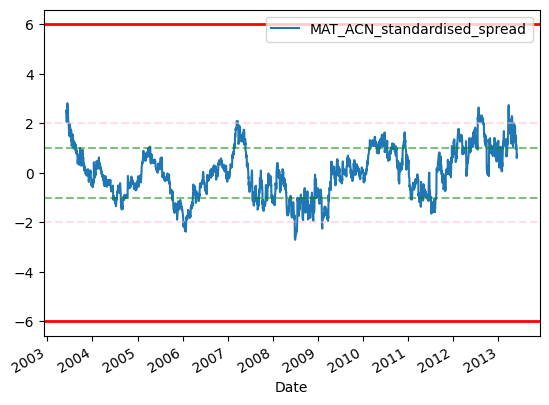

<Figure size 1000x600 with 0 Axes>

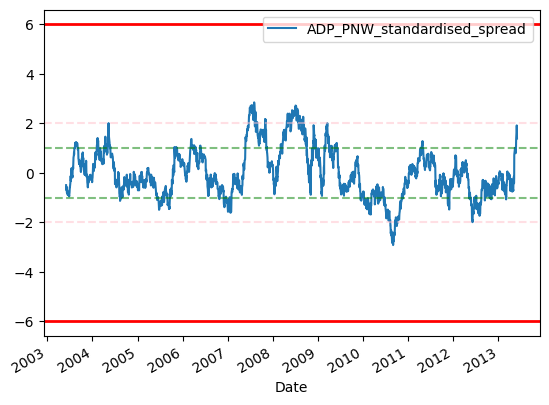

<Figure size 1000x600 with 0 Axes>

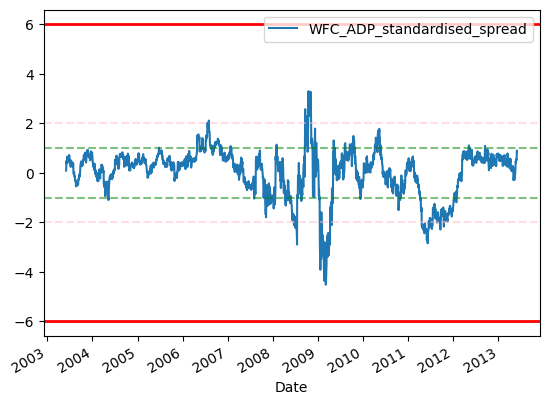

<Figure size 1000x600 with 0 Axes>

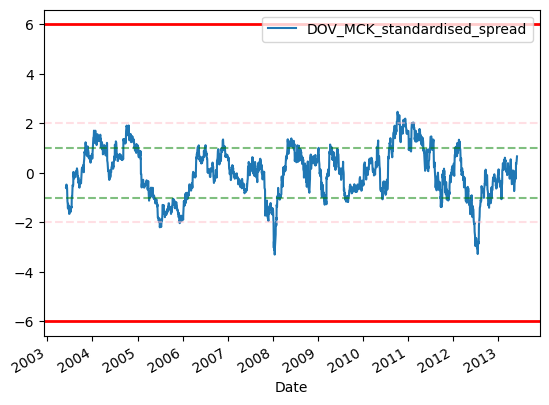

<Figure size 1000x600 with 0 Axes>

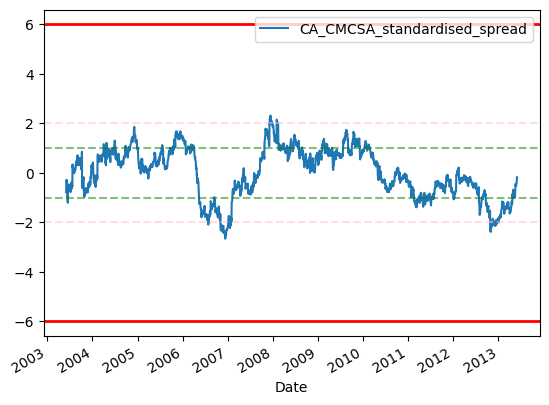

<Figure size 1000x600 with 0 Axes>

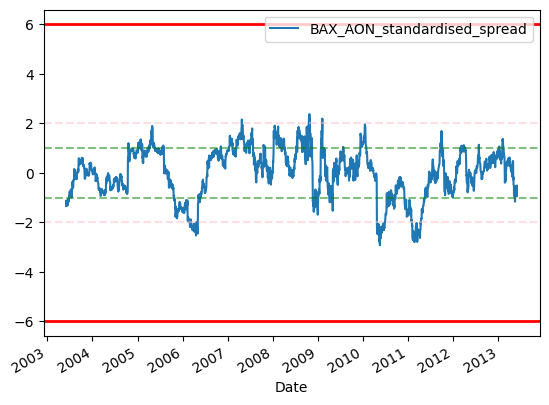

<Figure size 1000x600 with 0 Axes>

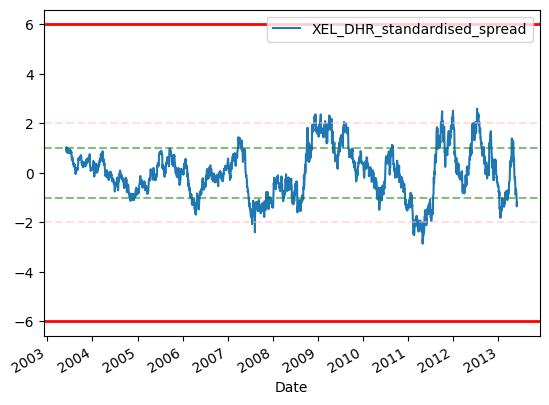

<Figure size 1000x600 with 0 Axes>

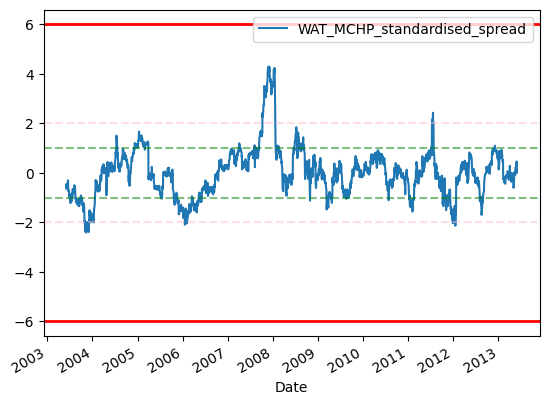

<Figure size 1000x600 with 0 Axes>

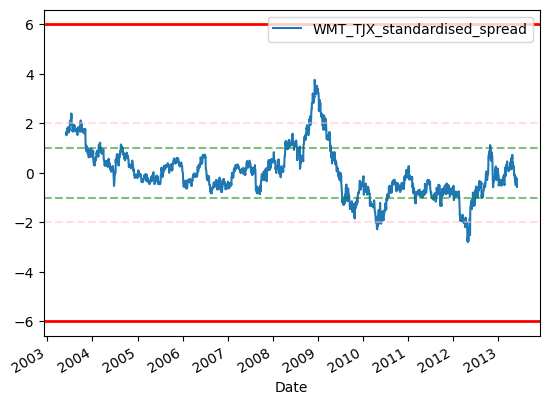

<Figure size 1000x600 with 0 Axes>

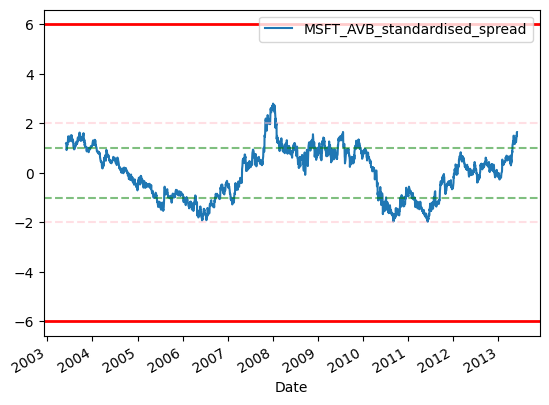

In [43]:
for _, pair in sample_spreads.iterrows():

    spread = retrieve_spread_table_from_sql_df(pair, spread_type="_standardised_spread")
    plot_series_with_lines(spread, level=2)